In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import scipy
import pickle
import warnings
import bidict
import collections

import sys
sys.path.append('..')
from construct_graph.graph import Graph, Flat
import construct_graph
import solve_laplace_operator

import sparseqr

from IPython.display import display, HTML

def calculate_pde_eigenvalues(m, n):
    a = 1 / 2
    return np.sqrt(((2 * np.pi * m)**2 + (2 * np.pi * n)**2) * a)

def style_plot(fig, ax, aspect="equal", label_fontsize=20, no_ticks=False, no_xticks=False, no_yticks=False):

    # Remove white space
    fig.tight_layout()

    # Makes axes aspect equal
    if aspect == "equal":
        ax.set_aspect(aspect)

    # Make tick labels bold font
    for label in ax.get_xticklabels(minor=True) + ax.get_yticklabels(minor=True):
        label.set_fontweight('bold')
        label.set_fontsize(label_fontsize)

    for label in (ax.get_xticklabels(minor=False) + ax.get_yticklabels(minor=False)):
        label.set_fontweight('bold')
        label.set_fontsize(label_fontsize)

    # Make border thicker
    for spine in ax.spines.values():
        spine.set_linewidth(2) 

    # xy_ticks
    major_tick_length = 7
    minor_tick_length = 4
    if no_ticks:
        major_xtick_length = 0
        major_ytick_length = 0
        minor_xtick_length = 0
        minor_ytick_length = 0
    elif no_xticks:
        major_xtick_length = 0
        major_ytick_length = major_tick_length
        minor_xtick_length = 0
        minor_ytick_length = minor_tick_length
    elif no_yticks:
        major_xtick_length = major_tick_length
        major_ytick_length = 0
        minor_xtick_length = minor_tick_length
        minor_ytick_length = 0
    else:
        major_xtick_length = major_tick_length
        major_ytick_length = major_tick_length
        minor_xtick_length = minor_tick_length
        minor_ytick_length = minor_tick_length
    ax.tick_params(axis='x', which='major', length=major_xtick_length, width=2, direction='out')
    ax.tick_params(axis='y', which='major', length=major_ytick_length, width=2, direction='out')
    ax.tick_params(axis='x', which='minor', length=minor_xtick_length, width=1, direction='out')
    ax.tick_params(axis='y', which='minor', length=minor_ytick_length, width=1, direction='out')

### Construct graph


|V| = 400


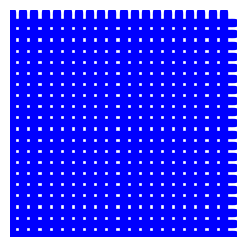

In [61]:
g = construct_graph.tiling.Tiling("square", 
                                  num_horizontal_displacements=10,
                                  num_vertical_displacements=10,
                                  figsize=3)

### Find eigenvalues

In [62]:
eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)
eigenvalues = eigs(np.linspace(3.8, 8, 50), solve_type="SVD iterate", printerval=np.inf, max_steps=20)
_, unique_inds = np.unique(np.round(eigenvalues, 8), return_index=True)
eigenvalues = eigenvalues[unique_inds]

### Collect continuum eigendata to compare against

In [63]:
continuum_eigendata = solve_laplace_operator.solve_laplace_operator.Continuum_Eigendata("square_flat_torus")

### Pair graph and PDE eigenvalues by comparing eigenspaces

In [64]:
projector = solve_laplace_operator.solve_laplace_operator.Projector(g, eigenvalues, continuum_eigendata)

In [71]:
(10**np.linspace(2, 4, 13)).astype(int)

array([  100,   146,   215,   316,   464,   681,  1000,  1467,  2154,
        3162,  4641,  6812, 10000])

In [65]:
m, n = 1, 0
projector(m, n)

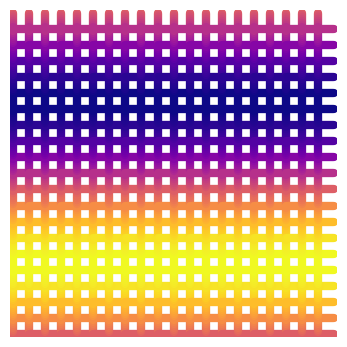

In [66]:
g.plot_graph(eigenmode=projector.data[1,0]['graph']['eigenfunction'][3].data, figsize=4)